Заголовок: Исследование сервиса аренды самокатов.

Описание проекта: С помощью данных сервиса GoFast мы стремимся помочь бизнесу вырасти.

Цель исследования: Проверка некоторых гипотез, которые могут помочь бизнесу вырасти.

Ход исследования:

* Подготовка данных: загрузка и изучение общей информации из предоставленных датасетов
* Предобработка данных: обработка пропущенных значений, корректировка типа даных, дубликатов.
* Расширение набора данных: добавление новых столбцов, таких как месяц поездки, выручка с пользователя за месяц и другие.
* Исследовательский анализ данных: изучение основных параметров объектов, их распределения.
* Проверка гипотез

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')
rides_data = pd.read_csv('/datasets/rides_go.csv')
subs_data = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides_data.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


##### Просмотр данных

In [5]:
subs_data.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
subs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Шаг 2. Предобработка данных

In [9]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format="%Y-%m-%d")
rides_data['month'] = rides_data['date'].dt.month

In [10]:
rides_data['duration'] = np.ceil(rides_data['duration']) 

In [11]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

В датафрейме users_data нет пропущенных значений

In [12]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

В датафрейме rides_data нет пропущенных значений

In [13]:
print(users_data.duplicated().sum())
users_data = users_data.drop_duplicates()

31


В users_data было 31 явных дубликатов, после обработки их не стало

In [14]:
rides_data.duplicated().sum()

0

В rides_data не было явных дубликатов

#### Шаг 3. Исследовательский анализ данных

##### Количество пользователей в городах

<AxesSubplot:title={'center':'Кол-во пользователей в городах'}, xlabel='Город', ylabel='Кол-во пользователей'>

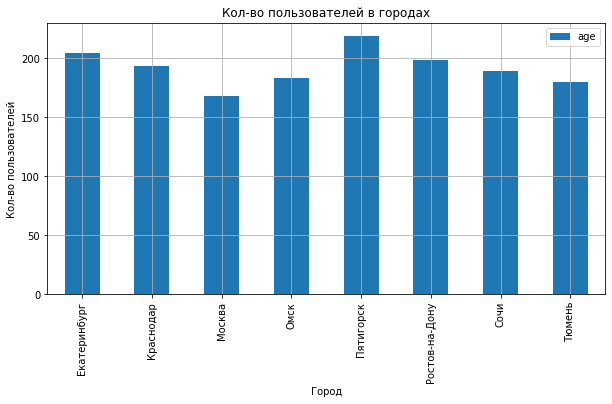

In [15]:
graph_users_data = users_data.pivot_table(index='city', values = 'age', aggfunc='count')
graph_users_data.plot(kind='bar', title='Кол-во пользователей в городах', xlabel='Город', ylabel='Кол-во пользователей', grid=True, figsize=(10, 5))

In [16]:
graph_users_data.columns = ['Частота']
graph_users_data.sort_values(by='Частота', ascending=False)

,Частота
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Чаще всего встречается Пятигорск, реже всего - Москва.

##### Соотношение пользователей с подпиской и без подписки

<AxesSubplot:title={'center':'Title'}, ylabel='amount_of_subs'>

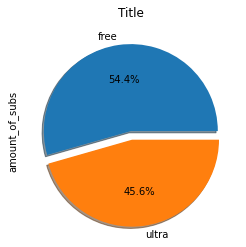

In [17]:
pie_users_data = users_data.pivot_table(index='subscription_type', values = 'age', aggfunc='count')
pie_users_data.columns = ['amount_of_subs']
pie_users_data.plot.pie(y='amount_of_subs', title="Title", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.1), \
                   shadow=True)

In [18]:
users_data[users_data['subscription_type'] == 'free']['user_id'].count() / users_data[users_data['subscription_type'] == 'ultra']['user_id'].count()

1.1945636623748213

Пользователей без подписки почти в 1.2 больше, чем с подпиской

##### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

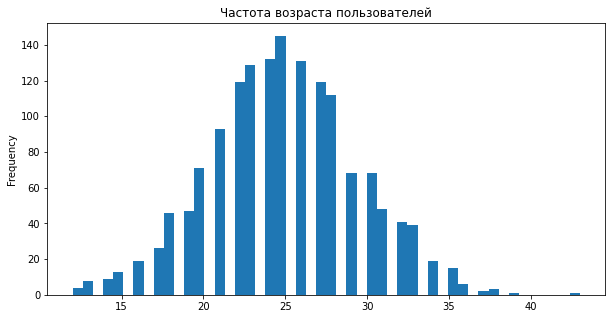

In [19]:
users_data['age'].plot(kind='hist', bins=50, figsize=(10, 5), xlabel='Возраст', ylabel='Частота', title='Частота возраста пользователей');
users_data['age'].describe()

Больше всего пользователей, которым 25 лет.

##### Расстояние поездок пользователей

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

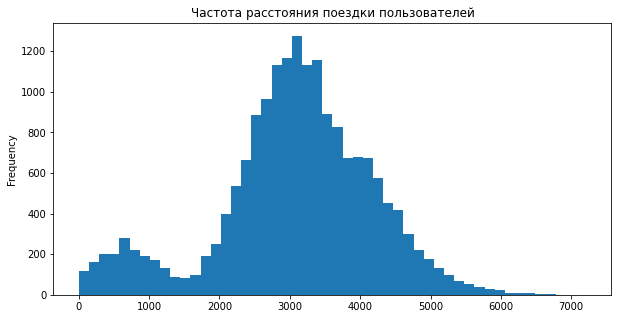

In [20]:
rides_data['distance'].plot(kind='hist', bins=50, figsize=(10, 5), xlabel='Расстояние', ylabel='Частота', title='Частота расстояния поездки пользователей')
rides_data['distance'].describe()

Чаще всего встречается значение в 3000 метров, наблюдается некая "впадина" между значениями примерно в 500 и 3000.

##### Длительность поездок пользователей

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

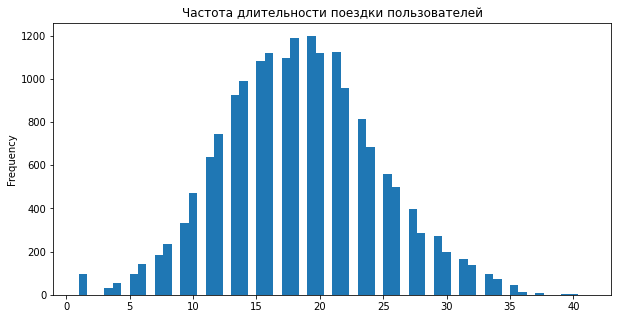

In [21]:
rides_data['duration'].plot(kind='hist', bins=60, figsize=(10, 5), xlabel='Длительность', ylabel='Частота', title='Частота длительности поездки пользователей')
rides_data['duration'].describe()

Длительность поездки чаще всего принимала значения от 15 до 20.

#### Шаг 4. Объединение данных

In [22]:
combined_data = users_data.merge(rides_data, on='user_id').merge(subs_data, on='subscription_type')
no_sub_users = combined_data[combined_data['subscription_type'] == 'free']
with_sub_users = combined_data[combined_data['subscription_type'] == 'ultra']

##### Проверка на соответствие размеров исходных таблиц и объединённой таблицы

In [23]:
print(subs_data.shape)
print(rides_data.shape)
users_data.shape

(2, 4)
(18068, 5)


(1534, 5)

In [24]:
combined_data.shape

(18068, 12)

##### Проверка на пропуски в объединённом датасете

In [25]:
combined_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски отсутствуют)

##### Расстояние поездок пользователей без подписки

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

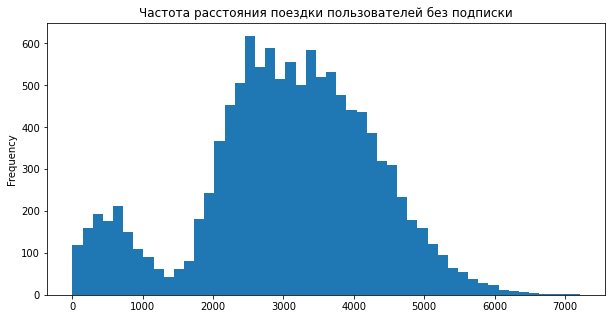

In [26]:
no_sub_users['distance'].plot(kind='hist', bins=50, figsize=(10, 5), xlabel='Расстояние', ylabel='Частота', title='Частота расстояния поездки пользователей без подписки');
no_sub_users['distance'].describe()

Больше всего пользователей без подписки с расстоянием поездки примерно от 2500 до 4000 метров.

##### Расстояние поездок пользователей с подпиской

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

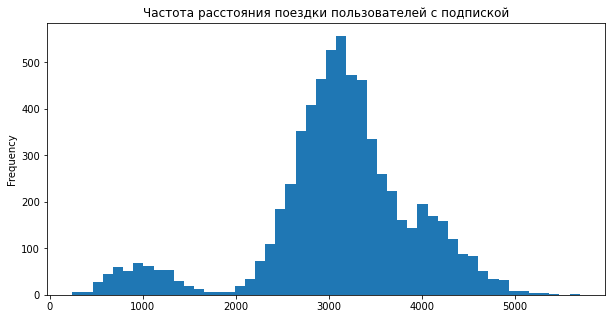

In [27]:
with_sub_users['distance'].plot(kind='hist', bins=50, figsize=(10, 5), xlabel='Расстояние', ylabel='Частота', title='Частота расстояния поездки пользователей с подпиской');
with_sub_users['distance'].describe()

Больше всего пользователей с подпиской с расстоянием поездки примерно в 3000 метров.

##### Длительность поездок пользователей без подписки

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

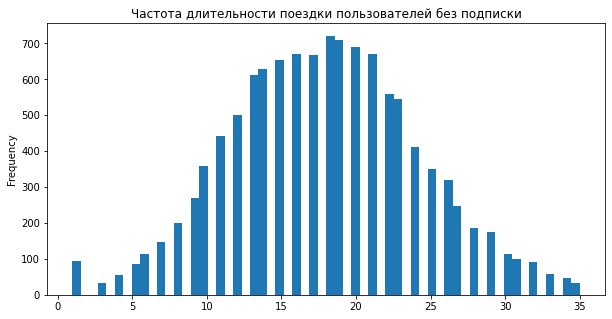

In [28]:
no_sub_users['duration'].plot(kind='hist', bins=60, figsize=(10, 5), xlabel='Длительность', ylabel='Частота', title='Частота длительности поездки пользователей без подписки');
no_sub_users['duration'].describe()

Больше всего пользователей без подписки с длительностью поездки примерно 18 минут.

##### Длительность поездок пользователей с подпиской

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

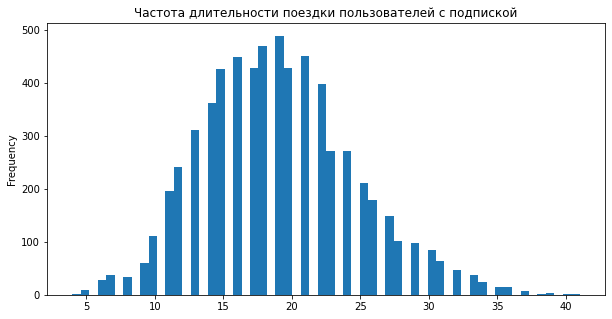

In [29]:
with_sub_users['duration'].plot(kind='hist', bins=60, figsize=(10, 5), xlabel='Длительность', ylabel='Частота', title='Частота длительности поездки пользователей с подпиской');
with_sub_users['duration'].describe()

Больше всего пользователей с подпиской с длительностью поездки примерно 19 минут.

Длительность поездки более-менее одинаковая, расстояние отличается (у пользователей с подпиской в среднем 3000, без подписки от 2500 до 4000)

#### Шаг 5. Подсчёт выручки

In [31]:
agg_data = combined_data.pivot_table(index=['user_id', 'month'], values=['distance', 'duration'], aggfunc=['sum', 'count'])
agg_data.columns = ['distance', 'duration', 'count', 'useless_column']
agg_data = agg_data.drop(columns='useless_column')

print(agg_data)
agg_data = agg_data.merge(users_data, on='user_id')
agg_data = agg_data.merge(subs_data, on='subscription_type')
agg_data['revenue'] = agg_data['start_ride_price'] * agg_data['count'] + agg_data['minute_price'] * agg_data['duration'] + agg_data['subscription_fee']
agg_data

                   distance  duration  count
user_id month                               
1       1       7027.511294      42.0      2
        4        754.159807       7.0      1
        8       6723.470560      46.0      2
        10      5809.911100      32.0      2
        11      7003.499363      56.0      3
...                     ...       ...    ...
1534    6       3409.468534      26.0      2
        8       7622.453034      48.0      2
        9       4928.173852      23.0      1
        11     13350.015305      78.0      4
        12      2371.711192      16.0      1

[11331 rows x 3 columns]


,user_id,distance,duration,count,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,7027.511294,42.0,2,Кира,22,Тюмень,ultra,6,0,199,451.0
1,1,754.159807,7.0,1,Кира,22,Тюмень,ultra,6,0,199,241.0
2,1,6723.470560,46.0,2,Кира,22,Тюмень,ultra,6,0,199,475.0
3,1,5809.911100,32.0,2,Кира,22,Тюмень,ultra,6,0,199,391.0
4,1,7003.499363,56.0,3,Кира,22,Тюмень,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,3409.468534,26.0,2,Альберт,25,Краснодар,free,8,50,0,308.0
11327,1534,7622.453034,48.0,2,Альберт,25,Краснодар,free,8,50,0,484.0
11328,1534,4928.173852,23.0,1,Альберт,25,Краснодар,free,8,50,0,234.0
11329,1534,13350.015305,78.0,4,Альберт,25,Краснодар,free,8,50,0,824.0


In [32]:
sub_revenue = agg_data[agg_data['subscription_type'] == 'ultra']
no_sub_revenue = agg_data[agg_data['subscription_type'] == 'free']

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза: Пользователи с подпиской тратят столько же времени на поездку, сколько и пользователи без подписки

Альтернативная гипотеза: Пользователи с подпиской тратят больше времени на поездку, чем пользователи без подписки

In [33]:
alpha = 0.05

results = st.ttest_ind(with_sub_users['duration'], no_sub_users['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что пользователи с подпиской тратят больше времени на поездки')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу о том, что пользователи с подпиской тратят больше времени на поездки


#####  Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров?

Нулевая гипотеза: Среднее расстояние поездки пользователей с подпиской равно 3130.

Альтернативная гипотеза: Среднее расстояние поездки пользователей с подпиской больше 3130.

In [34]:
alpha = 0.05
dist = 3130

results = st.ttest_1samp(with_sub_users['distance'], dist, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что среднее расстояние, которое проезжают пользователи за одну поездку равно 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: Месячная выручка от пользователей с подпиской равна месячной выручке пользователей без подписки.

Альтернативная гипотеза: Месячная выручка от пользователей с подпиской выше, чем месячная выручка пользователей без подписки.

In [35]:
alpha = 0.05

results = st.ttest_ind(sub_revenue['revenue'], no_sub_revenue['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу о том, что помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки


##### Обновление сервера, с которым взаимодействует мобильное приложение

Понадобился бы тест для парных выборок, то есть о равенстве среднего значения генеральной совокупности до и после изменения. Изменением в примере выступает обновление сервера, с которым взаимодействует мобильное приложение. В Python он осуществляется так: scipy.stats.ttest_rel.

Будем проверять двустороннюю гипотезу. Можем сформулировать такую нулевую гипотезу: различия между количеством обращений до и после обновления отсутствуют или что количество обращений после обновления больше или равно, чем до. Альтернативная гипотеза: количество обращений после обновления меньше, чем до обновления.

# Общий вывод

<b>1. Загрузка данных</b>

В начале работы мы получили три таблицы, состоящие из 1565 строк и 5 столбцов, 18068 строк и 4 столбцов, 2 строк и 4 столбцов соответственно.

<b>2. Предобработка данных</b>

Пропусков данных обнаружено не было, но были обнаружены 31 дубликатов в таблице с информацией о пользователях, которые были обработаны. В таблице с информацией о поездках столбец с датами был приведён к типу datetime, был добавлен столбец с месяцем поездки. Была округлена длительность поездки в сторону большего числа. 


<b>3. Исследовательский анализ данных</b>

Затем осуществлялся исследовательский анализ данных с помощью гистограмм. Выяснилось, что:
* Больше всего пользователей в Пятигорске, меньше всего - Москве
* Пользователей без подписки почти в 1.2 больше, чем с подпиской
* Больше всего пользователей возрастом в 25 лет.
* В среднем расстояние поездок пользователей составляет 3070 метров.
* В среднем длительность поездок составляет 18 минут


<b>4. Объединение данных</b>

Далее происходило объединение данных и создание отдельных таблиц с информацией о пользователях с подпиской и без подписки. Выяснилось следующее:

* Больше всего пользователей без подписки с расстоянием поездки примерно от 2500 до 4000 метров.
* Больше всего пользователей с подпиской с расстоянием поездки примерно в 3000 метров.
* Больше всего пользователей без подписки с длительностью поездки примерно 18 минут.
* Больше всего пользователей с подпиской с длительностью поездки примерно 19 минут.


<b>5. Подсчёт выручки</b>
Затем была рассчитана помесячная прибыль с одного пользователя с помощью сводных таблиц.


<b>6. Проверка гипотез</b>
После этого была проверка гипотез.

* Мы отвергли гипотезу о том, что пользователи с подпиской тратят больше времени на поездки в пользу альтернативной: пользователи с подпиской тратят больше времени на поездку, чем пользователи без подписки
* Нам не удалось отвергнуть нулевую гипотезу о том, что среднее расстояние, которое проезжают пользователи за одну поездку не превышает 3130 метров.
* Мы отвергли гипотезу о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки в пользу альтернативной: месячная выручка от пользователей с подпиской выше, чем месячная выручка пользователей без подписки.

Мы отвергли гипотезу о том, что пользователи с подпиской тратят больше времени на поездки и о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Мы не отвергли гипотезу о том, что среднее расстояние, которое проезжают пользователи за одну поездку не превышает 3130 метров.